In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

In [33]:
mpl.rcParams['figure.dpi'] = 50

In [2]:
np.random.seed(0)

(array([  8.,  25.,  84., 173., 259., 228., 137.,  61.,  21.,   4.]),
 array([ 6.95385695,  7.57556873,  8.19728051,  8.81899229,  9.44070408,
        10.06241586, 10.68412764, 11.30583942, 11.92755121, 12.54926299,
        13.17097477]),
 <BarContainer object of 10 artists>)

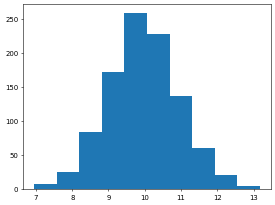

In [34]:
# Check that your notebook and matplotlib are working.
x = np.random.normal(10, size=1000)
plt.hist(x)

In [36]:
cluster_size = np.array([30, 20, 10])
num_point = cluster_size.sum()

means = np.array([[5, 0, 0], [0, 5, 0], [-2.5, -2.5, -2.5]])
sds = [3, 1, 1]

num_clust, num_dim = means.shape

np.random.seed(0)

clust_assignment = np.concatenate([[i] * s for i, s in enumerate(cluster_size)])
x = []
for i, s in enumerate(cluster_size):
    mean_i = means[i]
    sd_i = sds[i]
    x.append(sp.stats.multivariate_normal(mean=mean_i, cov=np.eye(num_dim) * sd_i).rvs(size=s))
x = np.concatenate(x)
x = pd.DataFrame(x).rename(columns=lambda i: f"x{i}")

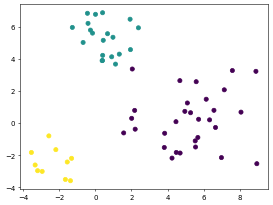

In [37]:
plt.scatter('x0', 'x1', c=clust_assignment, data=x)

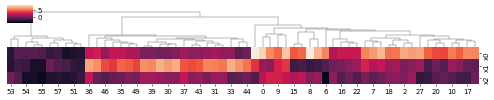

In [38]:
sns.clustermap(x.T, figsize=(10, 2), dendrogram_ratio=(0.0, 0.5))

In [39]:
from scipy.spatial.distance import pdist, squareform

/Users/byronsmith/anaconda3/envs/clust-tutorial2/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


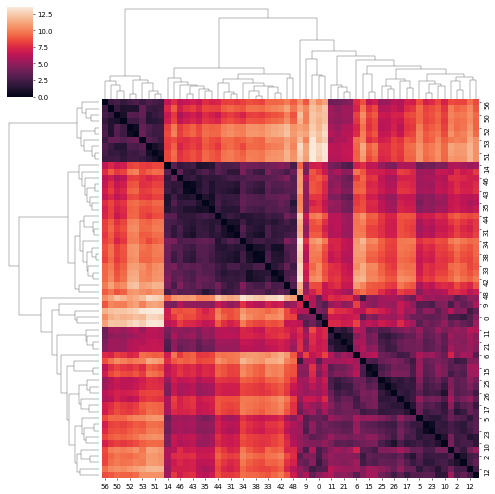

In [40]:
cdmat = pdist(x, metric='euclidean')
pdmat = pd.DataFrame(squareform(cdmat))
sns.clustermap(pdmat)

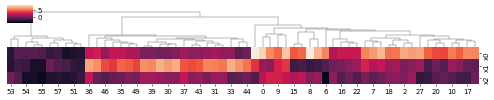

In [46]:
linkage = sp.cluster.hierarchy.linkage(cdmat, method="average")
sns.clustermap(x.T, figsize=(10, 2), dendrogram_ratio=(0.0, 0.5), col_linkage=linkage)

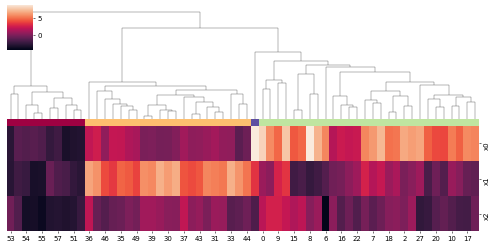

In [53]:
clust_label = sp.cluster.hierarchy.fcluster(linkage, t=5, criterion='distance') - 1
clust_label.max()

sns.clustermap(
    x.T, figsize=(10, 5),
    dendrogram_ratio=(0.0, 0.5),
    col_linkage=linkage,
    col_colors=mpl.cm.Spectral(clust_label / clust_label.max()),
)

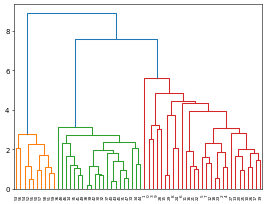

In [62]:
sp.cluster.hierarchy.dendrogram(linkage)
None

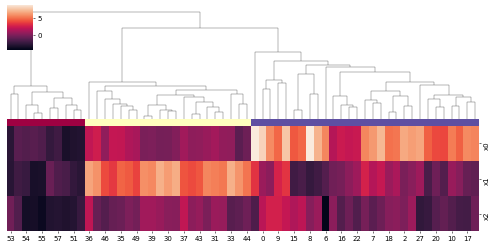

In [60]:
_cdmat = pdist(x, metric='euclidean')
_pdmat = pd.DataFrame(squareform(_cdmat))
_linkage = sp.cluster.hierarchy.linkage(_cdmat, method="average")
_clust_label = sp.cluster.hierarchy.fcluster(_linkage, t=6, criterion='distance') - 1

sns.clustermap(
    x.T, figsize=(10, 5),
    dendrogram_ratio=(0.0, 0.5),
    col_linkage=_linkage,
    col_colors=mpl.cm.Spectral(_clust_label / _clust_label.max()),
)